# Assignment 2

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from matplotlib.collections import LineCollection

import statsmodels.api as sm
import scipy.stats as stats
import pylab as py 

from scipy.optimize import minimize
from KalmanFilter import KalmanFilter
import warnings
warnings.filterwarnings("ignore")
import random
# library & dataset
import seaborn as sns

In [2]:
def import_data(path):
    # import data and set date type to float32
    data = pd.read_csv(path,dtype='float32')
    # convert to np.array and flattens
    return pd.Series(data.to_numpy().flatten())

In [3]:
# import data
path_sv = '../data/sv.dat'
y = import_data(path_sv)
y = y - np.mean(y)

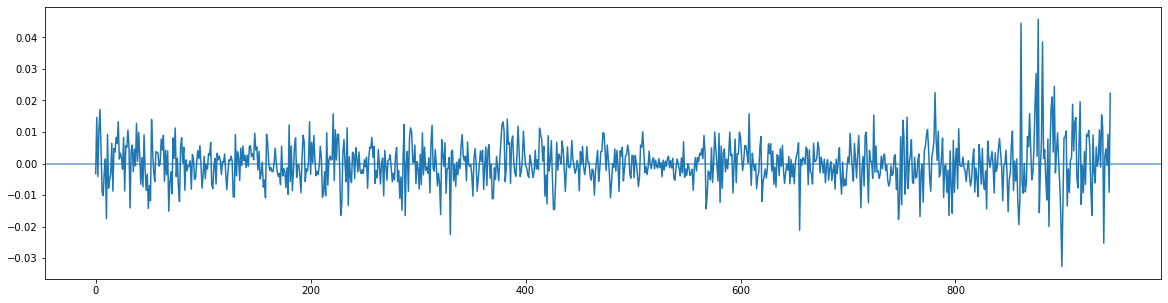

In [4]:
### Need to plot more descriptive stats of y, recheck each question again
fig = plt.figure(figsize=(20,5))
plt.plot(y/100)
plt.axhline(0, alpha = 0.7)
plt.savefig('../svts.png')

In [5]:
#Getting the descriptive Create a DataFrame
dfy = pd.DataFrame(y/100)
dfy.describe()

,0
count,9.450000e+02
mean,-2.168158e-10
std,7.110891e-03
min,-3.260808e-02
25%,-4.040805e-03
50%,-1.039808e-04
75%,3.997569e-03
max,4.569833e-02


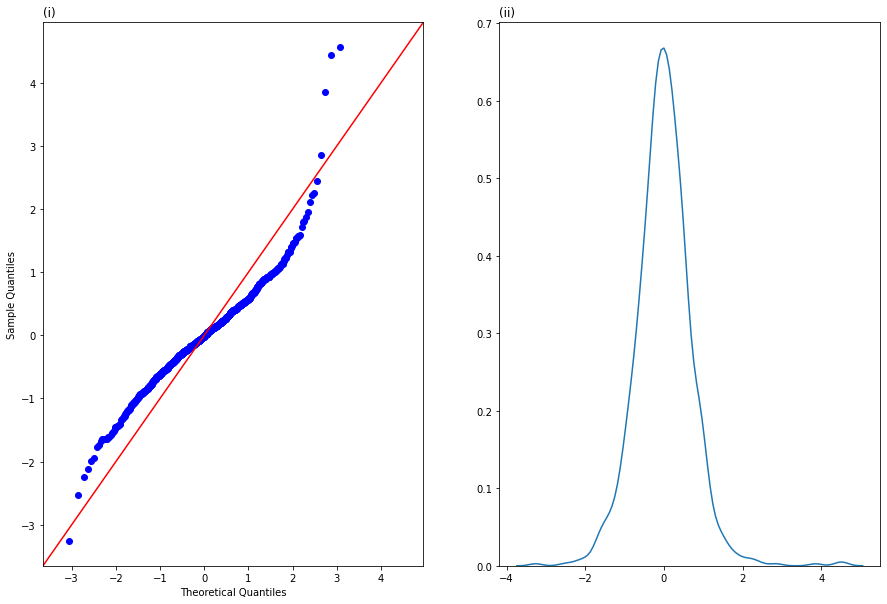

In [6]:
#QQ-a
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(15,10))
ax = axes.flatten()
sm.qqplot(y, stats.norm,line = '45', ax= ax[0])
ax[0].set_title( "(i)", loc='left')
#Density-a
sns.kdeplot(y, ax= ax[1])
ax[1].set_title( "(ii)", loc='left')
plt.savefig('../stats.png')

In [7]:
# transform x, including mean adjustment
# demean y?
x = np.log((y/100)**2)

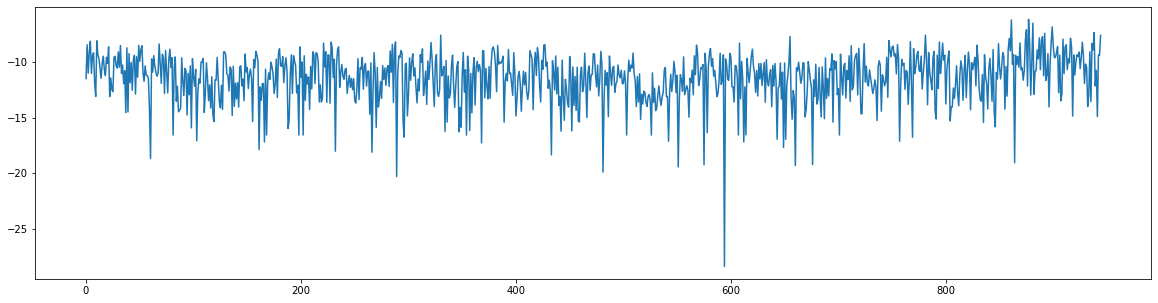

In [8]:
fig = plt.figure(figsize=(20,5))
plt.plot(x)
plt.savefig('../x.png')

In [9]:

theta_ini = [0.001, # omega
            0.95, # phi
            0.5] # sigma2_eta

kf = KalmanFilter(y, theta_ini)

res = kf.fit()

theta_hat = kf.theta_hat

Initial Theta value is set to [0.001, 0.95, 0.5]


In [10]:
v, F, h, P, K = kf.filtering(theta = theta_hat)

In [11]:
theta_hat

array([-0.07218623,  0.99272948,  0.00422027])

In [12]:
xi = theta_hat[0]/(1-theta_hat[1])
xi

-9.92862612214331

In [13]:
# sigma_eta
np.sqrt(theta_hat[2])

0.06496361893856412

In [14]:
h_hat, upper_cb, lower_cb, v, F, h, P, K, L, r, N = kf.smoothing(theta = theta_hat)

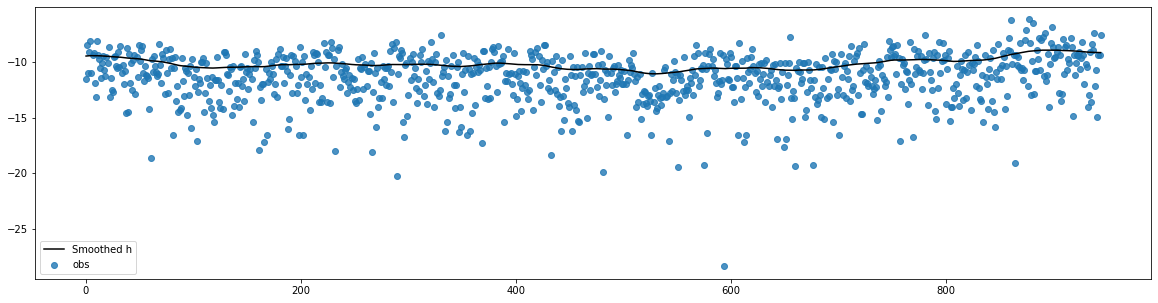

In [15]:
# smoothed h -> h_hat
fig = plt.figure(figsize=(20,5))
plt.scatter(x.index, x, label = 'obs', alpha = 0.8)
plt.plot(h_hat, color = 'black', label = 'Smoothed h')
plt.legend()

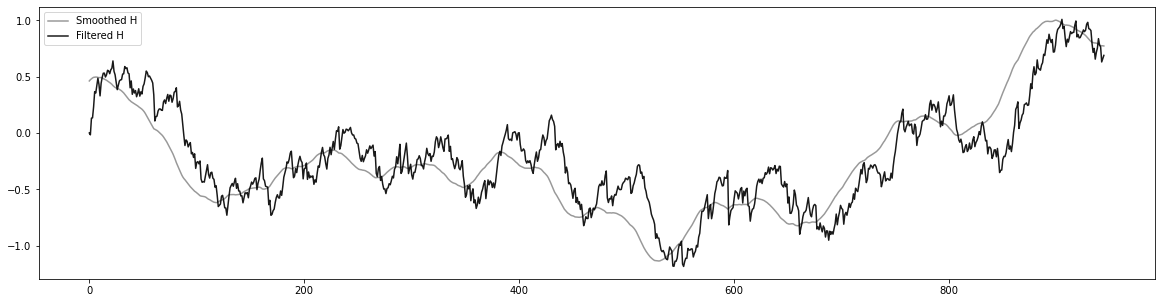

In [18]:
# filtered H #used to noted with h here, but i fixed it to H
fig = plt.figure(figsize=(20,5))
plt.plot(h_hat-xi, color = 'black', alpha = 0.4, label = 'Smoothed H')
plt.plot(h-xi, color = 'black', alpha = 0.9, label = 'Filtered H')
plt.legend()
plt.savefig('../d.png')

In [19]:
a = kf.particle_filtering()

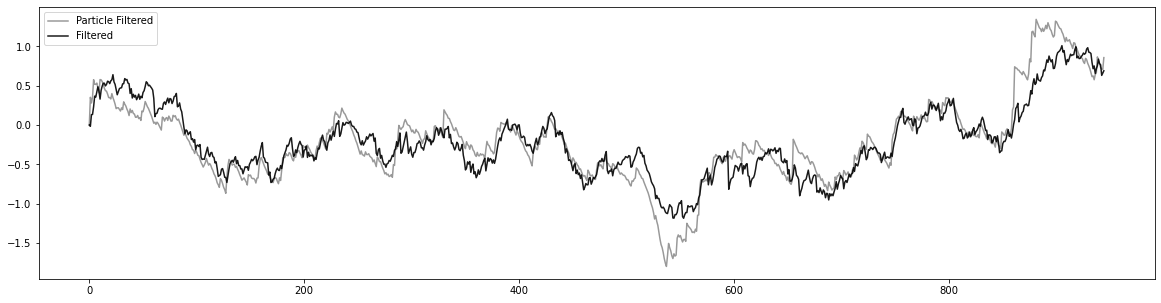

In [21]:
# filtered h
fig = plt.figure(figsize=(20,5))
plt.plot(a, color = 'black', alpha = 0.4, label = 'Particle Filtered')
plt.plot(h-xi, color = 'black', alpha = 0.9, label = 'Filtered')
plt.legend()
plt.savefig('../f.png')